In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/P2/T1/Dataset/non_overlapped/ML-no-test.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7974 entries, 0 to 7973
Columns: 274 entries, yellow sputum to conflicting_diseases
dtypes: int64(271), object(3)
memory usage: 16.7+ MB
None


# Visualize Data Distribution

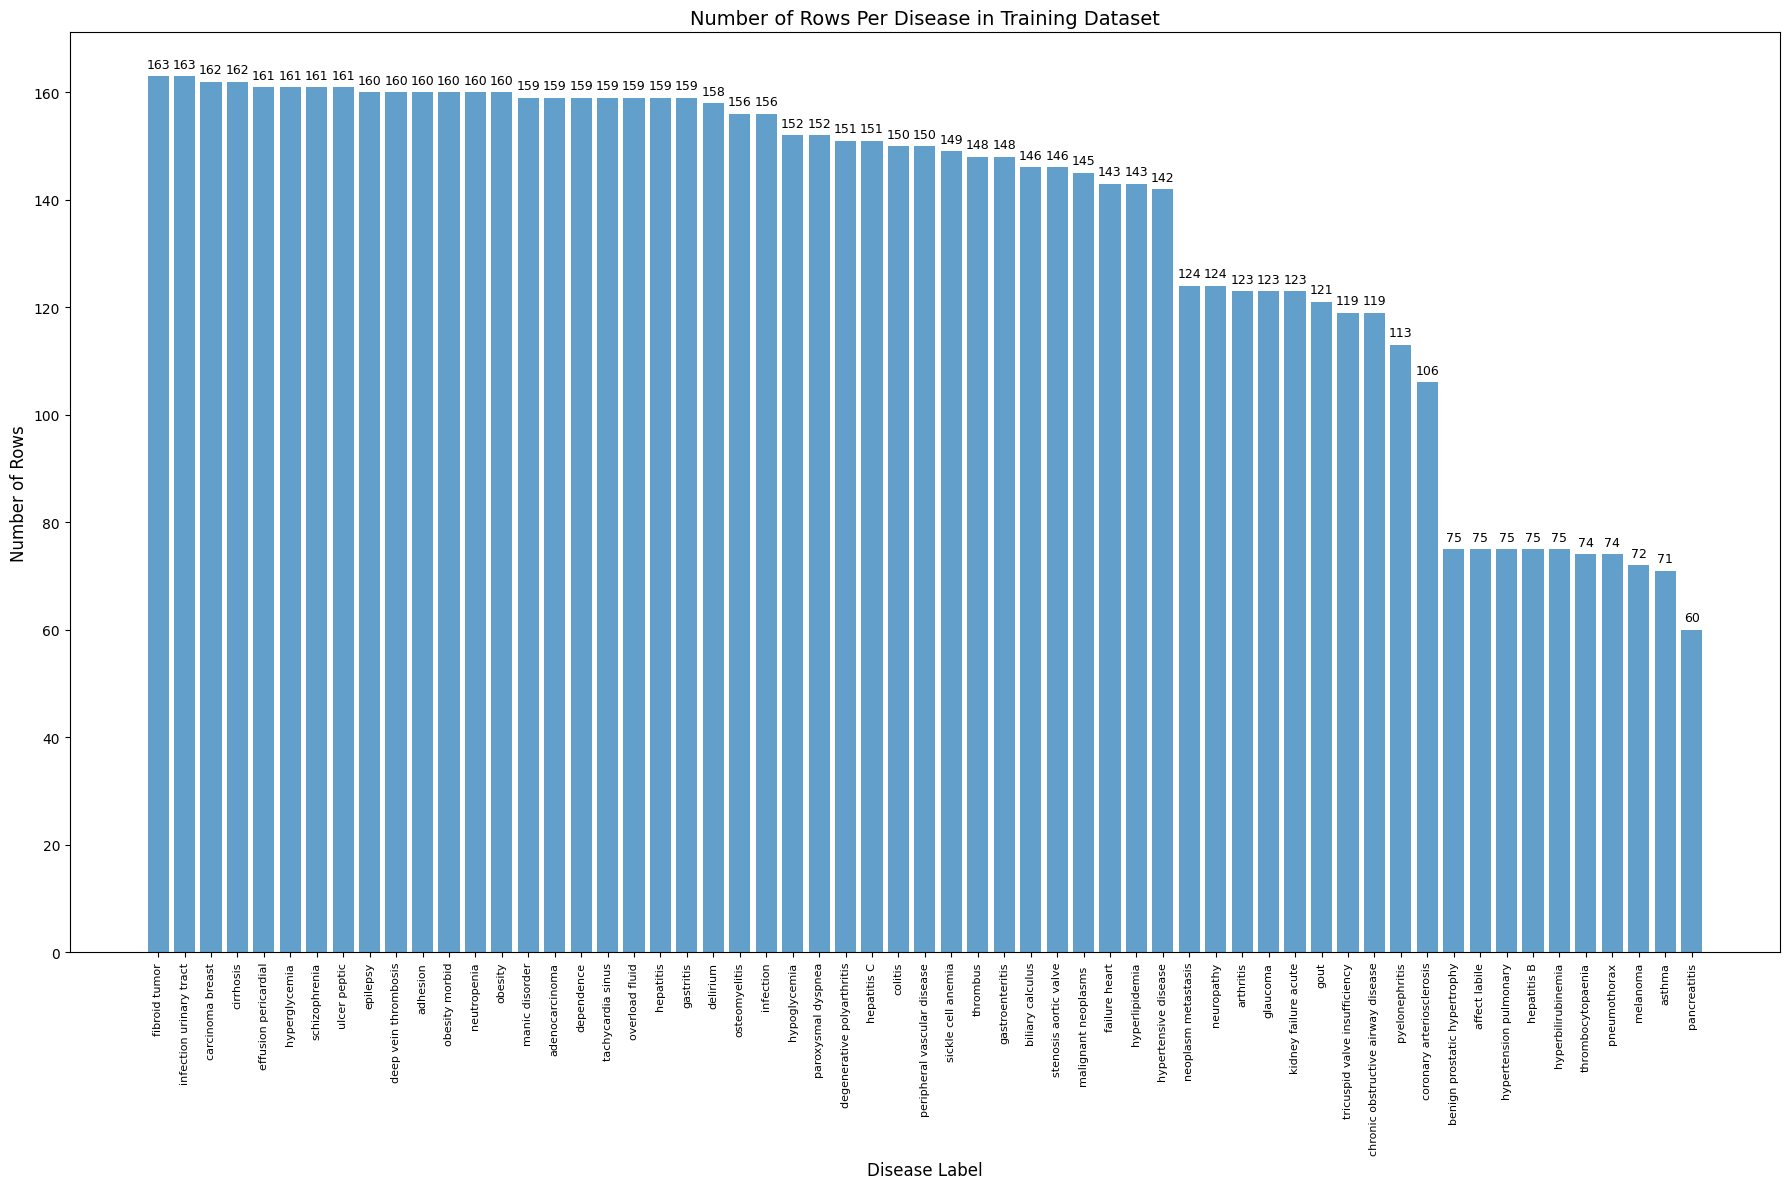

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the expanded dataset by disease to count rows per disease
disease_distribution = data["disease_label"].value_counts()

# Create a bar graph
plt.figure(figsize=(18, 12))
bars = plt.bar(disease_distribution.index, disease_distribution.values, alpha=0.7)

# Add row counts on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Customize the plot
plt.title("Number of Rows Per Disease in Training Dataset", fontsize=14)
plt.xlabel("Disease Label", fontsize=12)
plt.ylabel("Number of Rows", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

# Show the plot
plt.show()

# Naive Bayes

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Load the datasets
train_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/non_overlapped/ML-no-train.csv")
valid_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/non_overlapped/ML-no-val.csv")
test_data = pd.read_csv("/content/drive/MyDrive/P2/T1/Dataset/non_overlapped/ML-no-test.csv")
# Separate features and target
X_train, y_train = train_data.iloc[:, :-3], train_data["disease_label"]
X_valid, y_valid = valid_data.iloc[:, :-3], valid_data["disease_label"]
X_test, y_test = test_data.iloc[:, :-3], test_data["disease_label"]

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model on the training set
nb_model.fit(X_train, y_train)

# **Optional**: Use validation set to tune hyperparameters manually
# Evaluate on validation set (for tuning, NOT for final performance reporting)
y_valid_pred = nb_model.predict(X_valid)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy (for hyperparameter tuning only): {valid_accuracy:.2f}")

# Evaluate on test set (for final performance reporting)
y_test_pred = nb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy (final evaluation): {test_accuracy:.2f}")

# Print a detailed classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Validation Accuracy (for hyperparameter tuning only): 1.00
Test Accuracy (final evaluation): 1.00

Classification Report (Test Set):
                                    precision    recall  f1-score   support

                    adenocarcinoma       1.00      1.00      1.00       159
                          adhesion       1.00      1.00      1.00       160
                     affect labile       1.00      1.00      1.00        75
                         arthritis       1.00      1.00      1.00       123
                            asthma       1.00      1.00      1.00        71
      benign prostatic hypertrophy       1.00      0.99      0.99        75
                  biliary calculus       0.99      1.00      0.99       146
                  carcinoma breast       1.00      1.00      1.00       162
chronic obstructive airway disease       1.00      1.00      1.00       119
                         cirrhosis       1.00      1.00      1.00       162
                           col

# Generate Classification Report

In [5]:

import pandas as pd
from sklearn.metrics import classification_report

# Assuming rf_model is your trained model, and X_test, y_test are defined
y_pred = nb_model.predict(X_test)

# Generate the classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

# Convert the dictionary to a pandas DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Save the classification report as a CSV file
report_df.to_csv("/content/drive/MyDrive/P2/T1/Dataset/non_overlapped/ML/NB-no-class.csv", index=True)

print("Classification report saved to 'RMclassification_report.csv'")



Classification report saved to 'RMclassification_report.csv'


# Checking overlapping

In [6]:
"""
train_ids = set(X_train.index)
valid_ids = set(X_valid.index)
test_ids = set(X_test.index)

assert train_ids.isdisjoint(valid_ids), "Train and validation sets still overlap!"
assert train_ids.isdisjoint(test_ids), "Train and test sets still overlap!"
assert valid_ids.isdisjoint(test_ids), "Validation and test sets still overlap!"
"""

'\ntrain_ids = set(X_train.index)\nvalid_ids = set(X_valid.index)\ntest_ids = set(X_test.index)\n\nassert train_ids.isdisjoint(valid_ids), "Train and validation sets still overlap!"\nassert train_ids.isdisjoint(test_ids), "Train and test sets still overlap!"\nassert valid_ids.isdisjoint(test_ids), "Validation and test sets still overlap!"\n'